In [12]:
from __future__ import print_function
from nltk.tokenize import TreebankWordTokenizer
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
f = open('data.json')
data = json.load(f)

In [9]:
data[0].keys()

[u'category',
 u'author',
 u'url',
 u'text',
 u'title',
 u'comments',
 u'score',
 u'id']

In [11]:
data[0]['comments'][0].keys()

[u'body', u'author', u'parent_id', u'depth', u'score', u'id']

In [13]:
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize("test this tokenizer")

['test', 'this', 'tokenizer']

In [43]:
comment_lengths_OP = []
OP_comments = []
for d in data:
    for c in d['comments']:
        if c['author'] == d['author']:
            text = tokenizer.tokenize(c['body'])
            OP_comments.append((c['author'], text))
            comment_lengths_OP.append(len(text))

comment_lengths_OP_cutoff = []
for i in comment_lengths_OP:
    if i >= 30:
        comment_lengths_OP_cutoff.append(i)
    

In [44]:
print(len(comment_lengths_OP), len(OP_comments))
print(len(comment_lengths_OP_cutoff))

4270 4270
2636


In [45]:
OP_comment_lengths = np.array(comment_lengths_OP)
OP_comment_lengths_cutoff = np.array(comment_lengths_OP_cutoff)

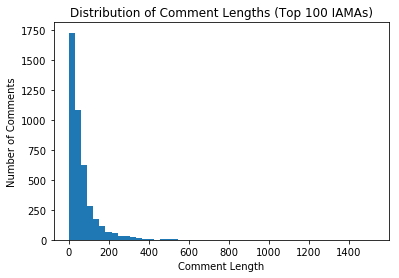

4270 comments total



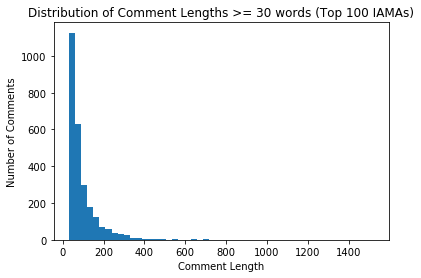

2636 comments >= 30 words total


In [50]:
plt.hist(OP_comment_lengths, bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comment Lengths (Top 100 IAMAs)')
plt.show()
print(len(comment_lengths_OP), 'comments total')
print()
plt.hist(OP_comment_lengths_cutoff, bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comment Lengths >= 30 words (Top 100 IAMAs)')
plt.show()
print(len(comment_lengths_OP_cutoff), 'comments >= 30 words total')